In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
from math import e
from sympy import *
x, y, z = symbols('x y z')
a, b, r= symbols('a b r')
theta = symbols('theta')
init_printing(use_unicode=True)
from scipy.optimize import fsolve

In [2]:
# Fy(x,y)
diff((3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2, y)

In [3]:
#fx(x,y)
diff((3/4)*(y**2) + (1/24)*(y**3) -(1/32)*(y**4) - (x**2), x)

<IPython.core.display.Javascript object>


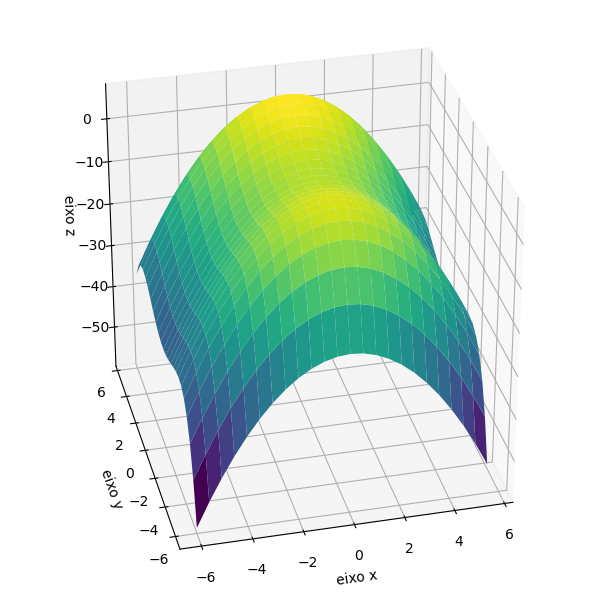

In [2]:
# gráficos de z = f(x,y)
eixox = np.arange(-6, 6, 0.5)  # min, max, passo
eixoy = np.arange(-6, 6, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2 #z = f(x,y)

fig1 = plt.figure(figsize=(6,6))          # cria o objeto figura
ax1 = Axes3D(fig1)                         # cria eixos 3d para a figura
ax1.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.viridis)  # estabelece ordem dos eixos
ax1.set_xlabel('eixo x')
ax1.set_ylabel('eixo y')
ax1.set_zlabel('eixo z')
plt.show()

<IPython.core.display.Javascript object>


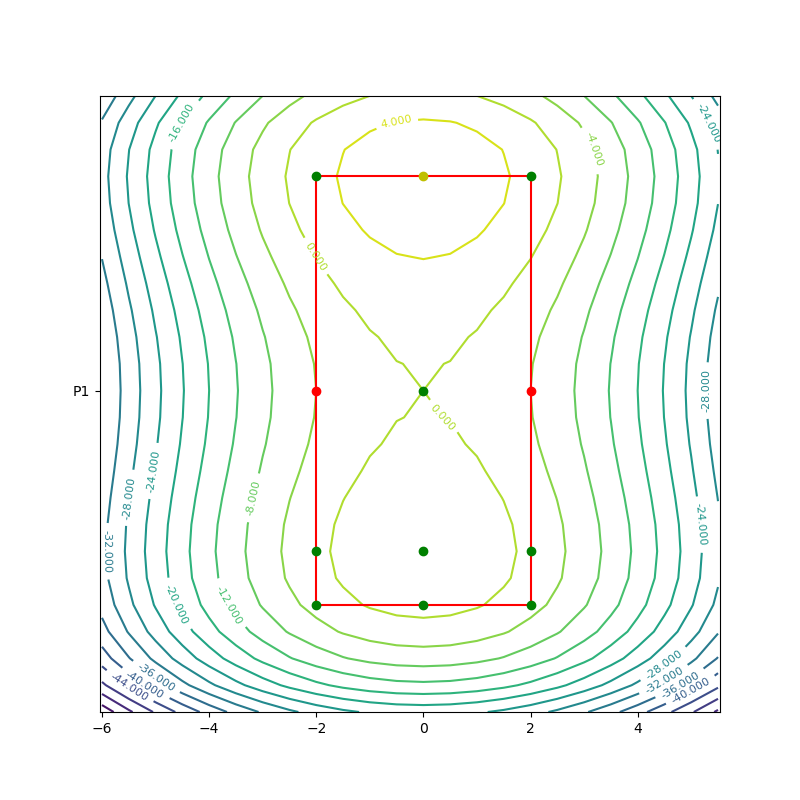

In [5]:
# gráfico das Curvas de Nível
eixox = np.arange(-6, 6, 0.5)  # min, max, passo
eixoy = np.arange(-6, 6, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2 #z = f(x,y)
fx = -2*x                           # x=0
fy = -0.125*y**3 +0.125*y**2 +1.5*y # fy = y(-0.125y² +0.125y +1.5)
                                    #raizes de y = (-3, 0 , 4)
# pontos Críticos f(x,y)= (0,-3) (0,0) (0,4)

fig, ax = plt.subplots(figsize=(8,8))

# Achar os valores máximo e mínimo absoluto de f(x,y)
# no retângulo R : x = [-2, 2], y = [-4, 4]
# Preto ponto Crítico de f(x,y)
# Amarelo ponto de Máximo do retângulo R (0,4)
# Vermelho ponto de Mínimo do retângulo R (-2,0) e (2,0)
tx = np.linspace(-2, 2, 100)
ty = np.linspace(-4, 4, 100)
R1 = [-2]*len(ty)
R2 = [2]*len(ty)
R3 = [-4]*len(tx)
R4 = [4]*len(tx)
plt.plot(R1,ty, 'r')
plt.plot(R2,ty, 'r')
plt.plot(tx, R3, 'r')
plt.plot(tx, R4, 'r')
plt.axis('equal')
plt.plot([0],[0], "go") # P1
plt.plot([2],[4], "go") # P2
plt.plot([2],[0], "ro") # P3 - Ponto de mínimo local
plt.plot([2],[-4], "go") # P4
plt.plot([0],[-4], "go") # P5
plt.plot([-2],[-4], "go") # P6
plt.plot([-2],[0], "ro") # P7 - ponto de mínimo local
plt.plot([-2],[4], "go") # P8
plt.plot([0],[4], "yo") # P9 - ponto de máximo 
plt.plot([-2],[-3], "go") # P10
plt.plot([2],[-3], "go") # P11
plt.plot([0],[-3], "go") # P12

# gráfico das curvas de nível
CS = plt.contour(x,y,z,20) 
plt.clabel(CS, inline=1, fontsize=8)
plt.show()

<IPython.core.display.Javascript object>


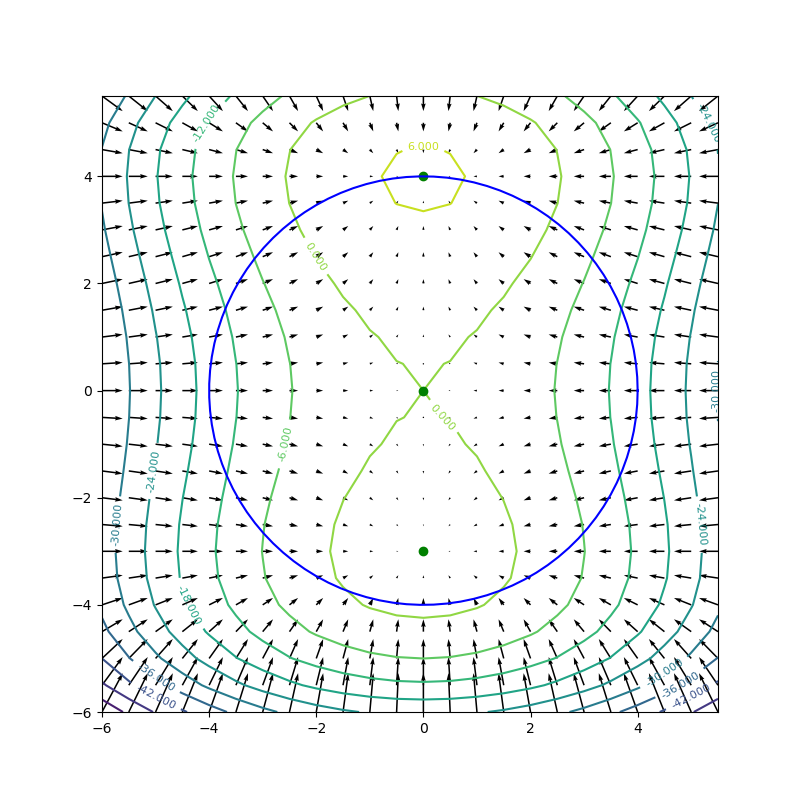

In [8]:
#g(x,y) = x0=0 e y0=0 - g(x,y)= x² +y² -4²
eixox = np.arange(-6, 6, 0.5)  # min, max, passo
eixoy = np.arange(-6, 6, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2 #z = f(x,y)
fx = -2*x                           # x=0
fy = -0.125*y**3 +0.125*y**2 +1.5*y # fy = y(-0.125y² +0.125y +1.5)
                                    #raizes de y = (-3, 0 , 4)
                                    # pontos Críticos f(x,y)= (0,-3) (0,0) (0,4)
fig, ax = plt.subplots(figsize=(8,8))

# gráfico do mapa dos vetores gradiente

ax.quiver(x,y,fx,fy)  # gradiente de f(x,y) = [fx, fy]
ax.set_aspect('equal')

plt.plot([0],[0], "go") #Ponto Crítico
plt.plot([0],[4], "go") #Ponto Crítico
plt.plot([0],[-3], "go") #Ponto Crítico

# funçao circular de g(x,y) com centro em (0,0) e raio 4
# x² + y² = raio² -> x²+y²=4² -> r - (c/k)²
c = 0
r = 4
k = 1
t = np.linspace(0, 2*np.pi, 100)
raio = r - (c/k)**2
a = raio*np.cos(t)
b = raio*np.sin(t) 
ax.plot(a, b, 'blue')

# gráfico das curvas de nível
CS = plt.contour(x,y,z,10) 
plt.clabel(CS, inline=1, fontsize=8)
plt.show()

In [9]:
# dado F(x,y) limitada por g(x,y) = (x²+y²=4²)
#∇f = (fx,fy)
#∇g = (2x,2y)
#∇f(x, y) = λ∇g(x, y)
# -2x=λ2x -> λ=-1
# -0.125*y**3 +0.125*y**2 +1.5*y = λ4y -> λ = -0.0313*y**2 +0.0313*y +0.375
def sistema (variaveis):  # definição do sistema
    (x, y, L) = variaveis
    eq1 = -2*x - L*2*x
    eq2 = -0.125*y**3 +0.125*y**2 +1.5*y - L*2*y
    eq3 = x**2 +y**2 - 16
    return [eq1, eq2, eq3]

s0 = np.array([0,4,0])  # solução inicial 1 - ponto de máximo em R
s = fsolve(sistema, s0)
print("P13 = ", s)

s0 = np.array([-2,0,0])  # solução inicial 2 - ponto de mínimo em R
s = fsolve(sistema, s0)
print("P14 = ", s)



P13 =  [0. 4. 0.]
P14 =  [-4.  0. -1.]


<IPython.core.display.Javascript object>


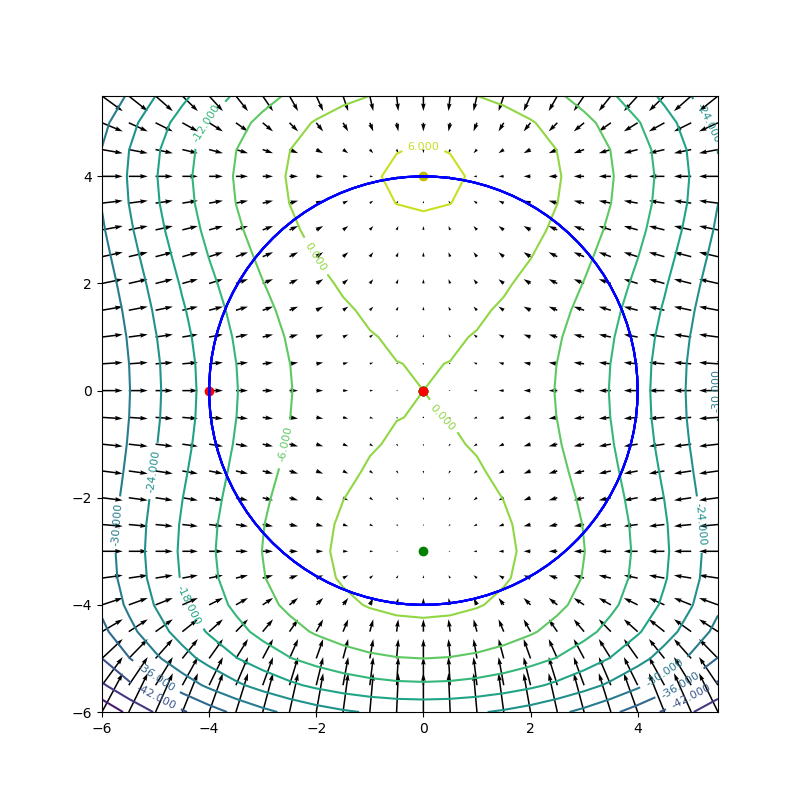

In [10]:
# gráfico das Curvas de Nível limitado por G, com destaque dos pontos críticos e dos pontos de máximo e mínimo

eixox = np.arange(-6, 6, 0.5)  # min, max, passo
eixoy = np.arange(-6, 6, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2 #z = f(x,y)
fx = -2*x                           # x=0
fy = -0.125*y**3 +0.125*y**2 +1.5*y # fy = y(-0.125y² +0.125y +1.5)
                                    #raizes de y = (-3, 0 , 4)
# pontos Críticos f(x,y)= (0,-3) (0,0) (0,4)


# gráfico do mapa dos vetores gradiente
fig, ax = plt.subplots(figsize=(8,8))
ax.quiver(x,y,fx,fy)  # gradiente de f(x,y) = [fx, fy]
ax.set_aspect('equal')


plt.plot([0],[0], "go") # ponto crítico
plt.plot([0],[4], "yo") # ponto de Máximo da Função/ponto crítico
plt.plot([0],[-3], "go") # ponto crítico
plt.plot([-4],[0], "ro") # ponto de Mínimo Limitado por G

# funçao circular de g(x,y)
# x² + y² = raio² -> 1/2*x²+y²=2² -> r² - (c/k)²
c = 0
r = 4
k = 1
t = np.linspace(0, 2*np.pi, 100)
raio = r - (c/k)**2
a = raio*np.cos(t)
b = raio*np.sin(t) 
ax.plot(a, b, 'blue')

# gráfico das curvas de nível
CS = plt.contour(x,y,z,10) 
plt.clabel(CS, inline=1, fontsize=8)
plt.show()

<IPython.core.display.Javascript object>


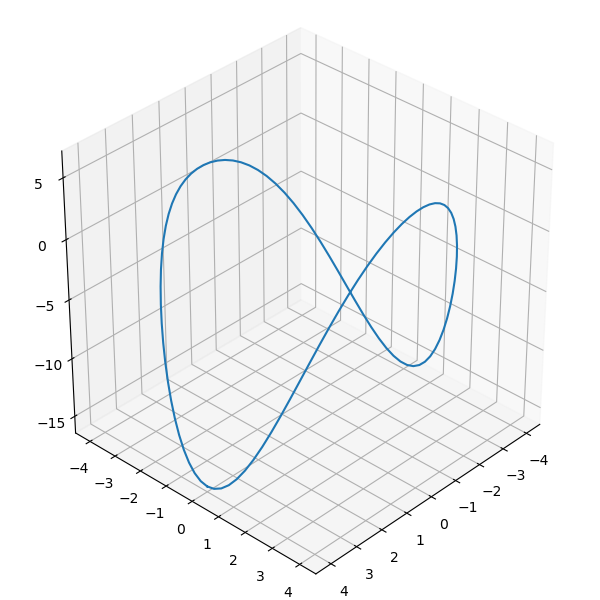

In [19]:
# gráfico das Curvas de Nível
eixox = np.arange(-6, 6, 0.5)  # min, max, passo
eixoy = np.arange(-6, 6, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)

# funçao circular de g(x,y,z)
c = 0
r = 4
k = 1
t = np.linspace(0, 2*np.pi, 100)
raio = r - (c/k)**2
x = raio*np.cos(t)
y = raio*np.sin(t)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2
ax.plot(a, b, 'blue')

# Pontos Críticos de f(x,y) e Máximos e mínimos
plt.plot([0],[0],[0],"go") # ponto crítico
plt.plot([0],[4],[0], "yo") # ponto de Máximo da Função/ponto crítico
plt.plot([0],[-3],[0], "go") # ponto crítico
plt.plot([-4],[0],[0], "ro") # ponto de Mínimo Limitado por G

fig1 = plt.figure(figsize=(6,6))          # cria o objeto figura
ax1 = Axes3D(fig1)                         # cria eixos 3d para a figura
ax1.plot(x, y, z)  # estabelece ordem dos eixos
plt.show()
